<a href="https://colab.research.google.com/github/navseducation/Gen-AI-Purdue-Course/blob/main/Autoencoders_VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GenAI in Action: The Power of Autoencoders & VAEs

Welcome! In our last session, we saw how GANs can generate incredible images. Today, we'll explore another fascinating family of generative models: **Autoencoders** and **Variational Autoencoders (VAEs)**.

These models are masters of data compression and reconstruction, which gives them some unique and powerful abilities.

**Our Plan for Today:**
1.  **Understand the Autoencoder Concept:** We'll learn how AI can learn to compress and then recreate data.
2.  **A Peek Under the Hood:** We'll build and train a simple Autoencoder with Keras to clean up noisy images.
3.  **Practical Application:** Use an Autoencoder for Anomaly Detection.
4.  **Introduce VAEs:** We'll see how a clever twist turns an Autoencoder into a powerful generative tool.
5.  **Train a Simple VAE:** Build and train a basic VAE to generate new images.
6.  **Unleash the Power of Pre-trained Models:** We'll explore amazing, hands-on demos using pre-trained models for creative generation.

### Setup: Installing Our AI Toolkits

We'll need `tensorflow` for building our simple Autoencoder, and `diffusers` from Hugging Face to easily use powerful pre-trained models.

In [ ]:
%pip install tensorflow diffusers accelerate matplotlib requests torch torchvision transformers

---
## 1. What is an Autoencoder? The Perfect Photocopier

Imagine you have a magical photocopier with two parts:

1.  **The Encoder (The Shrinker):** This part takes a high-resolution photo and compresses it into a tiny, super-efficient summary (like a ZIP file). This summary is called the **latent space** or **embedding**.

2.  **The Decoder (The Rebuilder):** This part takes the tiny summary from the Encoder and tries to reconstruct the original high-resolution photo from it.

The entire machine is trained with one simple goal: the reconstructed photo must look **exactly** like the original. To get good at this, the Encoder must become an expert at capturing the most important features of an image in its tiny summary. This ability to find the essential essence of data is incredibly useful!

---
## 2. A Peek Under the Hood: Training a Denoising Autoencoder

**Goal:** One of the coolest applications of Autoencoders is **denoising**. We can train the model by giving it a noisy, corrupted image and telling it to reconstruct the original, clean version. It learns to see through the noise and capture the true underlying image.

**Demo:** We'll build a simple Autoencoder with Keras and teach it to clean up noisy images of handwritten digits from the MNIST dataset.

In [ ]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.686275,0.101961,0.650980,1.000000,0.968627,0.498039,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.117647,0.141176,...,0.882353,0.674510,0.992157,0.949020,0.764706,0.250980,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.192157,0.933333,0.992157,...,0.364706,0.321569,0.321569,0.219608,0.152941,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.070588,0.858824,0.992157,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.313726,0.611765,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
pd.DataFrame(x_train_noisy[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.441324,0.645205,0.580280,0.271710,0.000000,0.000000,0.000000,0.252577,0.000000,0.000000,...,0.070320,0.551403,0.000000,0.444859,0.000000,0.662116,0.401559,0.126271,0.000000,0.122528
1,0.000000,0.718230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033731,0.081240,...,0.632445,0.000000,0.725150,0.000000,0.316953,0.000000,0.000000,0.000000,0.024975,0.000000
2,0.169313,0.233480,0.000000,0.471961,0.156278,0.000000,0.000000,0.185176,0.000000,0.000000,...,0.131118,0.000000,0.000000,0.000000,0.000000,0.116738,0.523781,0.000000,0.000000,0.000000
3,0.000000,0.366329,0.000000,0.643267,0.196669,0.000000,0.275747,0.523750,0.056378,0.000000,...,0.975508,0.365780,0.000000,0.528911,0.000000,0.000000,0.000000,0.000000,0.000000,0.296063
4,0.434547,0.000000,0.000000,0.891045,0.000000,0.000000,0.776969,0.377894,0.266614,0.000000,...,0.011994,0.000000,0.642172,0.000000,0.038613,0.000000,0.000000,0.000000,0.077092,1.000000
5,0.079599,0.651877,0.000000,0.000000,0.000000,0.000000,0.173981,0.139407,0.033131,0.000000,...,0.514992,0.066001,0.039870,0.578303,1.000000,0.348695,0.000000,0.000000,0.000000,0.000000
6,0.024721,0.000000,0.505109,0.000000,0.147885,0.000000,0.000000,0.000000,0.268397,0.431031,...,0.571313,0.304612,0.688581,1.000000,0.000000,0.730346,0.000000,0.011571,0.483456,0.000000
7,0.599904,0.000000,0.475692,0.579711,1.000000,0.000000,0.000000,0.000000,1.000000,0.727255,...,0.932861,0.725671,0.710622,0.049131,0.725571,0.151939,0.633183,0.244577,0.859229,0.000000
8,0.476637,0.088828,0.000000,0.000000,0.000000,0.558769,0.000000,0.841966,1.000000,0.993168,...,0.154755,0.000000,0.000000,0.000000,0.713118,0.000000,0.000000,0.202223,0.000000,0.000000
9,0.000000,0.000000,0.863338,0.241594,0.045115,0.658066,0.000000,0.000000,1.000000,0.481180,...,0.000000,0.044088,0.191357,0.000000,0.290072,0.000000,0.185616,0.161184,0.000000,0.000000


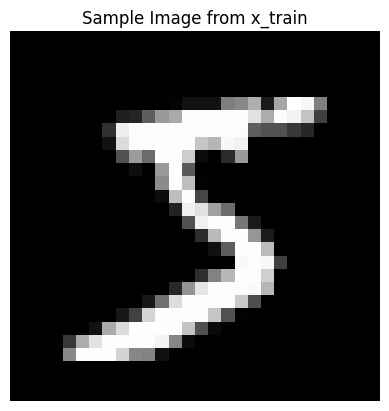

In [ ]:
plt.imshow(x_train[0], cmap='gray')
plt.title('Sample Image from x_train')
plt.axis('off')
plt.show()

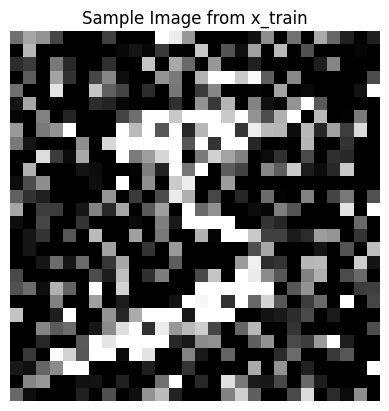

In [ ]:
plt.imshow(x_train_noisy[0], cmap='gray')
plt.title('Sample Image from x_train')
plt.axis('off')
plt.show()

Starting Autoencoder training...
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.2684 - val_loss: 0.1107
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1107 - val_loss: 0.1075
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1080 - val_loss: 0.1059
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.1061 - val_loss: 0.1041
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1046 - val_loss: 0.1028
Training finished.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


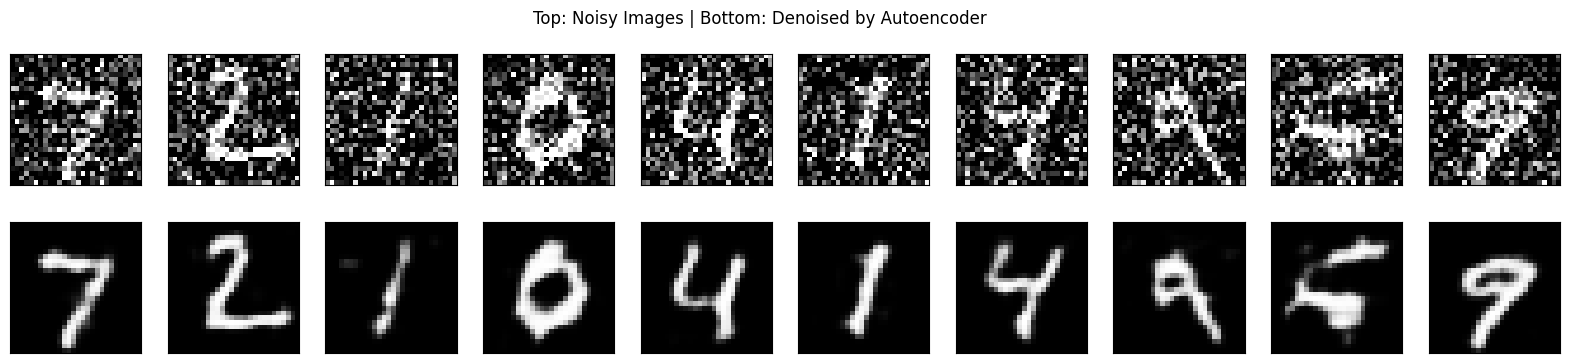

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load and Prepare the Data ---
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add random noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# --- 2. Build the Autoencoder Model ---
input_img = keras.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# --- 3. Train the Model ---
print("Starting Autoencoder training...")
autoencoder.fit(x_train_noisy, x_train, # Teach it to map noisy images to clean ones
                epochs=5, # Short training for demo purposes
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))
print("Training finished.")

# --- 4. See the Results ---
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed (denoised) images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.suptitle('Top: Noisy Images | Bottom: Denoised by Autoencoder')
plt.show()

### Demo: Anomaly Detection

**Concept:** If we train an autoencoder on only 'normal' data, it will get very good at reconstructing it. But when we show it an 'abnormal' piece of data, it will struggle, resulting in a poor reconstruction with a high error. We can use this reconstruction error to detect anomalies!

**Demo:** We'll train an autoencoder on only the digit '1' from the MNIST dataset. Then we'll see how well it reconstructs other digits. It should do a terrible job on them, which is how we spot the 'anomaly'.

Epoch 1/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0940 - val_loss: 0.0152
Epoch 2/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0146 - val_loss: 0.0122
Epoch 3/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0119 - val_loss: 0.0100
Epoch 4/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0096 - val_loss: 0.0077
Epoch 5/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0074 - val_loss: 0.0062
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


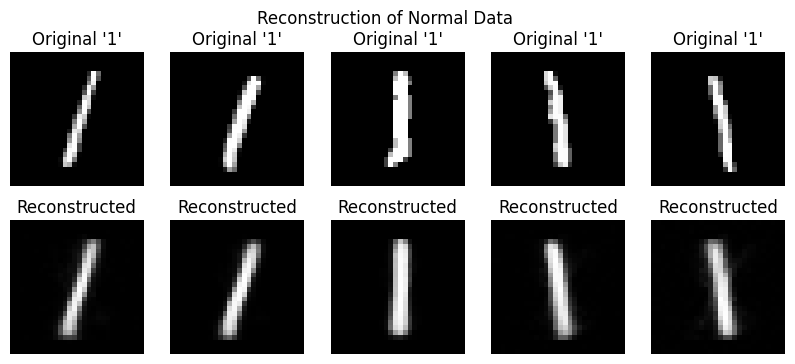

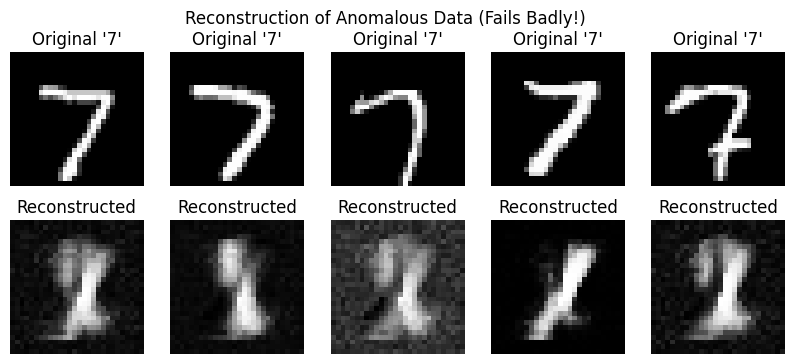

In [ ]:
# --- 1. Prepare Data: Only the digit '1' for training ---
(x_train_all, y_train_all), (x_test_all, y_test_all) = keras.datasets.mnist.load_data()
x_train_all = x_train_all.astype('float32') / 255.0
x_test_all = x_test_all.astype('float32') / 255.0

x_train_ones = x_train_all[y_train_all == 1]
x_test_ones = x_test_all[y_test_all == 1]
x_test_sevens = x_test_all[y_test_all == 7] # Our 'anomalies'

# --- 2. Build and Train a simple Autoencoder ---
input_layer = keras.Input(shape=(28, 28, 1))
x = layers.Flatten()(input_layer)
encoded = layers.Dense(32, activation='relu')(x) # 32-dimensional latent space
decoded = layers.Dense(784, activation='sigmoid')(encoded) # 784 = 28*28
output_layer = layers.Reshape((28, 28, 1))(decoded)

anomaly_ae = keras.Model(input_layer, output_layer)
anomaly_ae.compile(optimizer='adam', loss='mse')
anomaly_ae.fit(x_train_ones, x_train_ones, epochs=5, shuffle=True, validation_data=(x_test_ones, x_test_ones))

# --- 3. Test on normal and abnormal data ---
reconstructed_ones = anomaly_ae.predict(x_test_ones)
reconstructed_sevens = anomaly_ae.predict(x_test_sevens)

# --- 4. Visualize the results ---
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    # Normal data (digit 1)
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_ones[i], cmap='gray')
    ax.set_title("Original '1'")
    ax.axis('off')
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_ones[i], cmap='gray')
    ax.set_title("Reconstructed")
    ax.axis('off')
plt.suptitle('Reconstruction of Normal Data')
plt.show()

plt.figure(figsize=(10, 4))
for i in range(n):
    # Anomaly data (digit 7)
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_sevens[i], cmap='gray')
    ax.set_title("Original '7'")
    ax.axis('off')
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_sevens[i], cmap='gray')
    ax.set_title("Reconstructed")
    ax.axis('off')
plt.suptitle('Reconstruction of Anomalous Data (Fails Badly!)')
plt.show()

---
## 3. What is a VAE? The Creative Photocopier

A **Variational Autoencoder (VAE)** is a more advanced, creative version of an Autoencoder.

Instead of compressing an image to a *single point* in the latent space, a VAE compresses it to a *fuzzy region*. This means we can then pick a random point from this fuzzy region and ask the Decoder to reconstruct it. Because we're picking a new random point each time, the Decoder generates a **new, unique image** that is similar to the original but not identical.

**This is the key:** VAEs are not just for reconstruction; they are for **generation**!

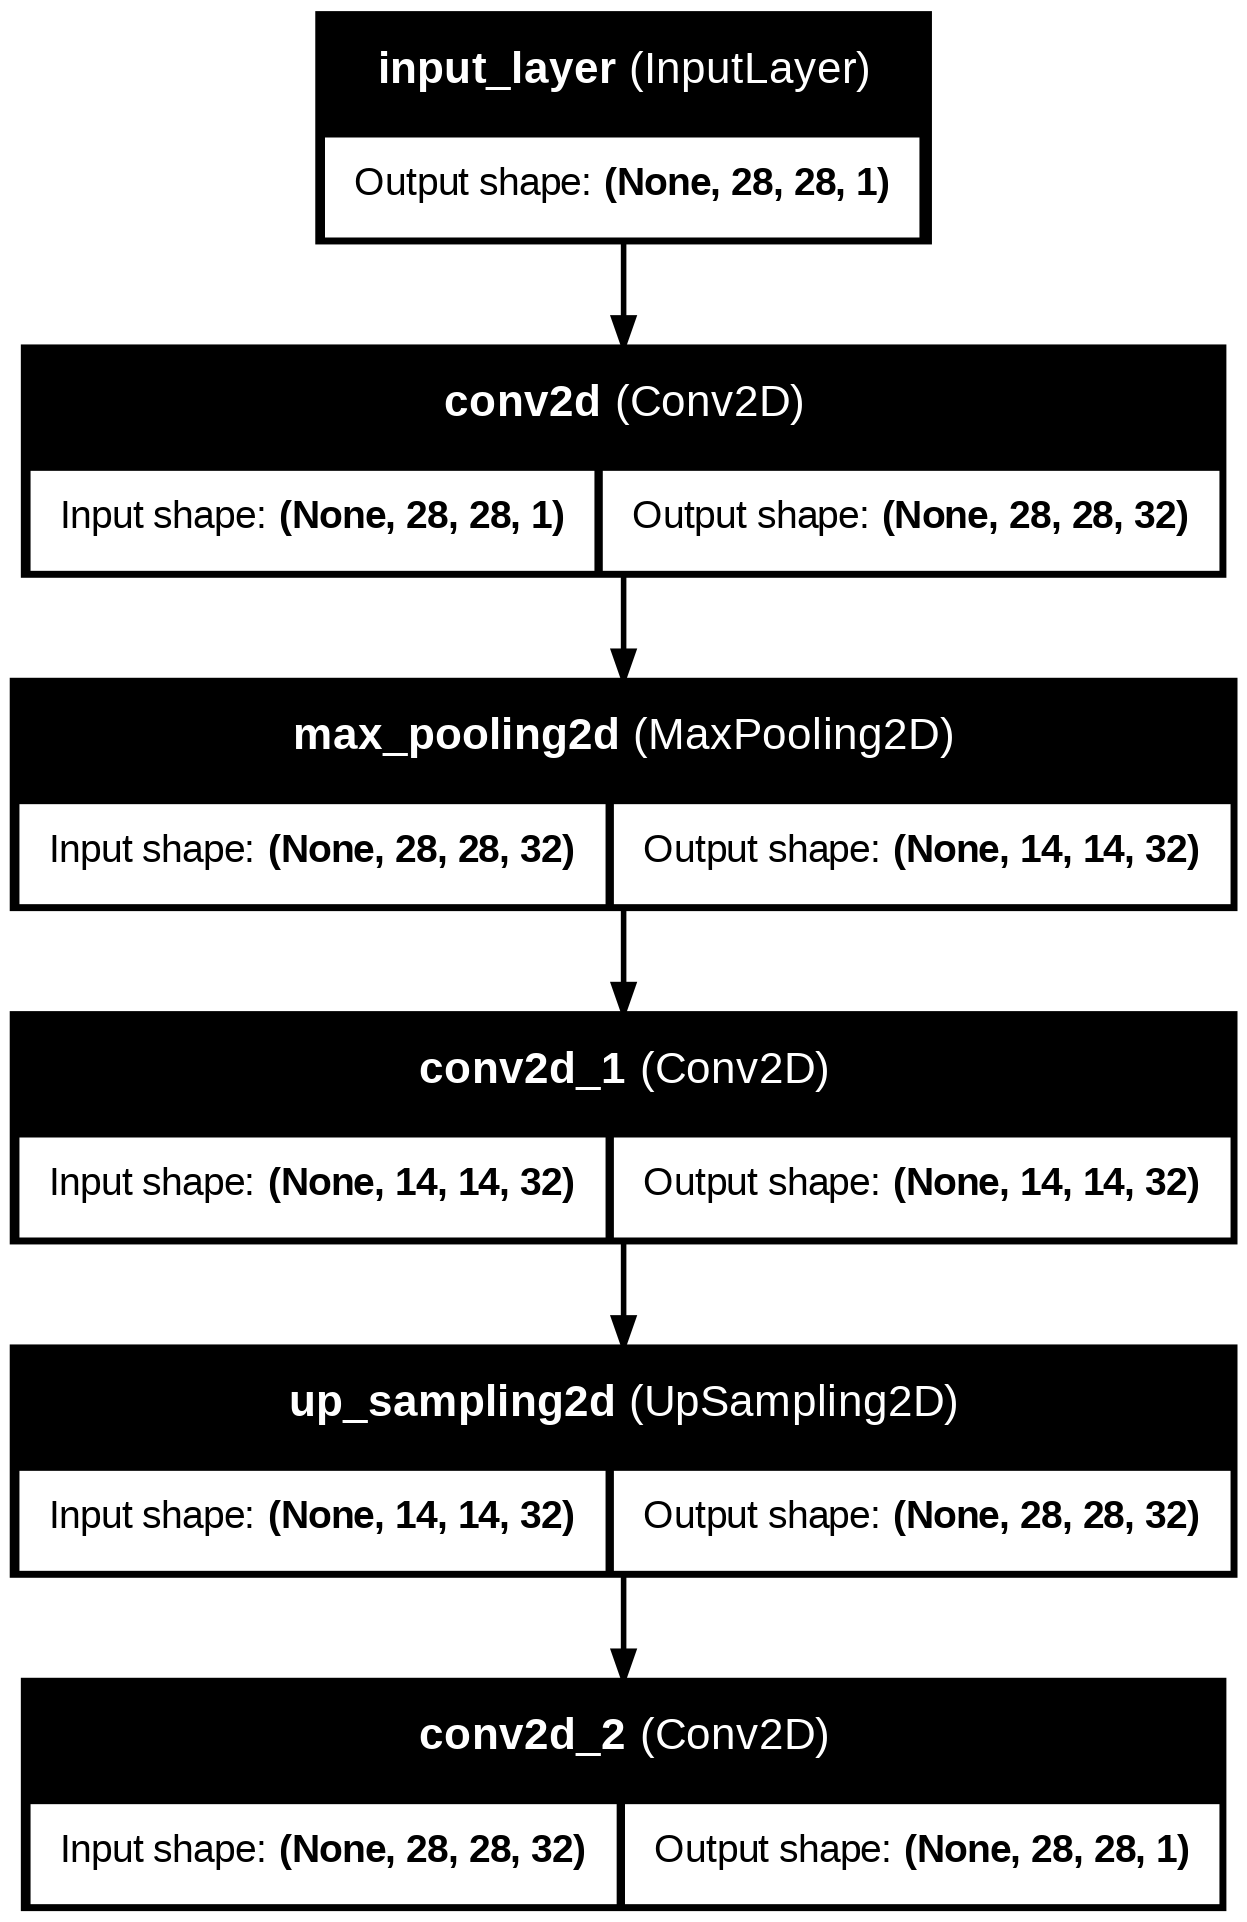

In [ ]:
from tensorflow.keras.utils import plot_model
# Visualize the autoencoder architecture
plot_model(autoencoder, show_shapes=True, show_layer_names=True)

---
## 4. The Power of Pre-trained Models: Cool Applications

Just like with GANs, the real magic comes from using large, pre-trained models. Modern image generation often uses a combination of VAEs and another technology called **Diffusion**.

### Demo 1: Text-to-Image Generation (Stable Diffusion)

**Concept:** This is the most popular use case. Models like **Stable Diffusion** use a VAE internally. You provide a text prompt, and the model generates a brand new image that matches it.

**Demo:** Let's create a fantasy landscape from our imagination.

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating image for prompt: 'A beautiful fantasy landscape with a floating castle in the sky, digital art, highly detailed'


  0%|          | 0/50 [00:00<?, ?it/s]

Image generated successfully!


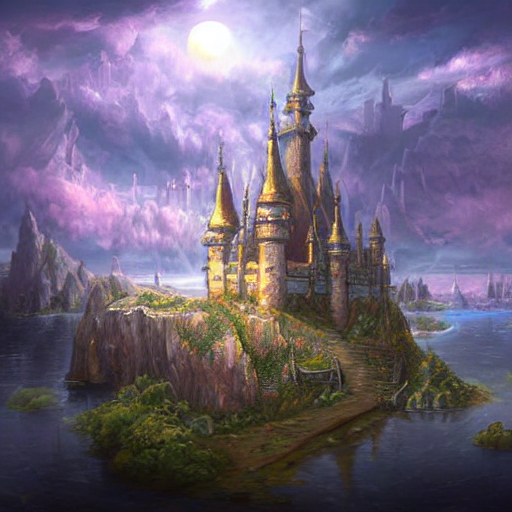

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
if torch.cuda.is_available():
    pipe = pipe.to("cuda")

prompt = "A beautiful fantasy landscape with a floating castle in the sky, digital art, highly detailed"

print(f"Generating image for prompt: '{prompt}'")
image = pipe(prompt).images[0]

print("Image generated successfully!")
image

### Demo 2: Image-to-Image Generation

**Concept:** We can provide an initial image along with a text prompt. The AI will use our image as a starting point and transform it to match the prompt, while keeping the original composition.

**Demo:** Let's turn a simple landscape photo into a winter wonderland.

In [ ]:
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image
import requests
import torch

pipe = StableDiffusionImg2ImgPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
if torch.cuda.is_available():
    pipe = pipe.to("cuda")

url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"
init_image = Image.open(requests.get(url, stream=True).raw).resize((768, 512))

prompt = "A beautiful mountain landscape in winter, covered in snow, fantasy art"

print("Transforming image...")
transformed_image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images[0]

print("Transformation complete!")

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(init_image)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(transformed_image)
ax[1].set_title('AI-Transformed Image')
ax[1].axis('off')
plt.show()

### Demo 3: Image Inpainting - The Magic Eraser

**Concept:** We can erase part of an image and ask the AI to intelligently fill in the blank space based on a text prompt.

**Demo:** Let's replace a dog in a picture with a cat.

In [ ]:
from diffusers import StableDiffusionInpaintPipeline
from PIL import Image
import requests
import torch

pipe = StableDiffusionInpaintPipeline.from_pretrained("runwayml/stable-diffusion-inpainting", torch_dtype=torch.float16)
if torch.cuda.is_available():
    pipe = pipe.to("cuda")

img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

init_image = Image.open(requests.get(img_url, stream=True).raw).resize((512, 512))
mask_image = Image.open(requests.get(mask_url, stream=True).raw).resize((512, 512))

prompt = "a cute cat sitting on a bench"

print("Replacing object and inpainting...")
inpainted_image = pipe(prompt=prompt, image=init_image, mask_image=mask_image).images[0]

print("Inpainting complete!")

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(init_image)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(inpainted_image)
ax[1].set_title('Inpainted Image')
ax[1].axis('off')
plt.show()

model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

safety_checker/pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

RuntimeError: Data processing error: CAS service error : Error : single flight error: Real call failed: ReqwestMiddlewareError(Reqwest(reqwest::Error { kind: Request, url: "https://transfer.xethub.hf.co/xorbs/default/a2f96891c2c6cadb738b461502b508f783f6d30062d11d658784c72a48b3e2e7?X-Xet-Signed-Range=bytes%3D0-63161384&Expires=1755968882&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly90cmFuc2Zlci54ZXRodWIuaGYuY28veG9yYnMvZGVmYXVsdC9hMmY5Njg5MWMyYzZjYWRiNzM4YjQ2MTUwMmI1MDhmNzgzZjZkMzAwNjJkMTFkNjU4Nzg0YzcyYTQ4YjNlMmU3P1gtWGV0LVNpZ25lZC1SYW5nZT1ieXRlcyUzRDAtNjMxNjEzODQiLCJDb25kaXRpb24iOnsiRGF0ZUxlc3NUaGFuIjp7IkFXUzpFcG9jaFRpbWUiOjE3NTU5Njg4ODJ9fX1dfQ__&Signature=qb-c06W2NLnpyZURDvsoM1S3HU12nZ2ZUW4MduleWtIzgoqZo2UHFMTL-LtLBYz8v7s~mIRcSfVB14HtA10IpUbCFEFtxpSlBf6pm9~Rgz5Coyi9cY7Eg1lTI21rNaPPaqxEbx4S5It7fwl-ymI4TU9do2jz4ZLFfuIbPRRGJ3KTMD4nNL5kjGgTCVyCgIWaPDNNm6e1KTWuIZ6HDUk5J0xitcc7qV66dAyelN6r1E5wY-7tuwTQ7n~7emxA9SQfKkBRfVfXhl0sY406RiM8TuW3H5rYKeArG-ZRl9NFpLEgrruLlI9vNWGtre-xL03xElHFBbaZSgKSo16cnHPFXw__&Key-Pair-Id=K2L8F4GPSG1IFC", source: hyper_util::client::legacy::Error(Connect, Custom { kind: Other, error: Os { code: 32, kind: BrokenPipe, message: "Broken pipe" } }) }))

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load and Prepare the Data ---
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add random noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
